# Excercise

## Sử dụng k-means và HAC để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


# Import Iris Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable (optional)

In [3]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Kmeans

In [4]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X_tsne)

KMeans(n_clusters=4, n_init=10)

In [5]:
# Centroids of clusters
centers = kmeans.cluster_centers_
centers

array([[ 16.367983 ,  -2.3250918],
       [-23.233711 ,  -1.5488241],
       [  6.217758 ,   2.4309897],
       [ 10.833527 ,  -0.1682018]], dtype=float32)

In [6]:
# Predict clusters of each data point
y_kmeans = kmeans.predict(X_tsne)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3], dtype=int32)

## Visualization

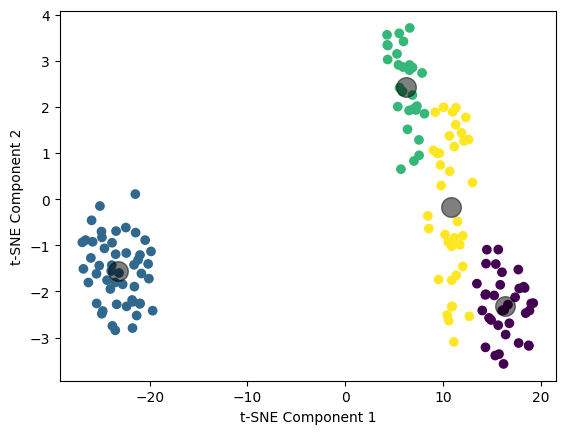

In [7]:
fig, ax = plt.subplots(1)
labels = kmeans.labels_
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")

# Add axis titles
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")

# Plot cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

plt.show()

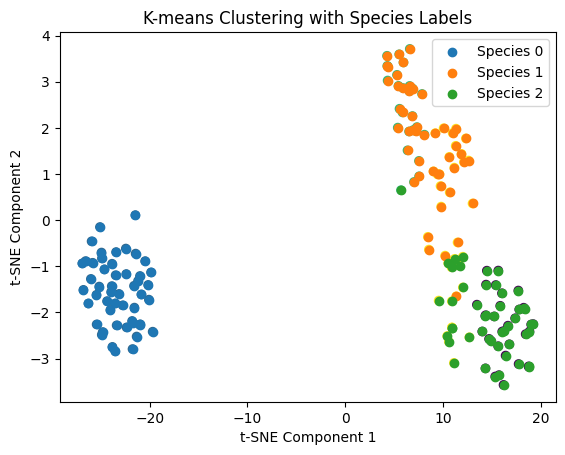

In [8]:
# Plot the assigned cluster labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")

# Plot the species labels
species_labels = np.unique(y)
for label in species_labels:
    indices = np.where(y == label)
    plt.scatter(
        X_tsne[indices, 0],
        X_tsne[indices, 1],
        marker="o",
        label=f"Species {label}",
    )

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-means Clustering with Species Labels")
plt.legend()
plt.show()

# HAC

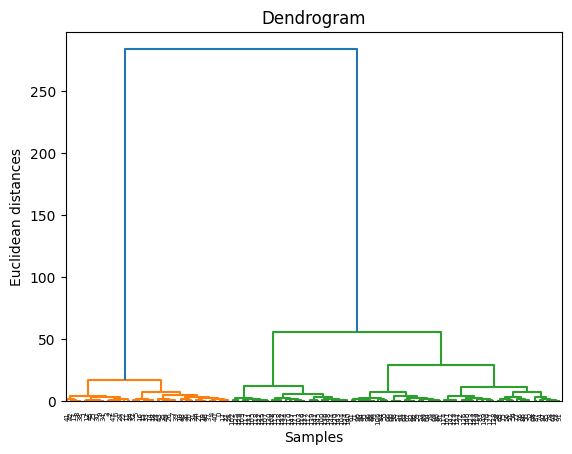

In [9]:
# Plot the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_tsne, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")

plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
y_hc = hc.fit_predict(X_tsne)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Visualization

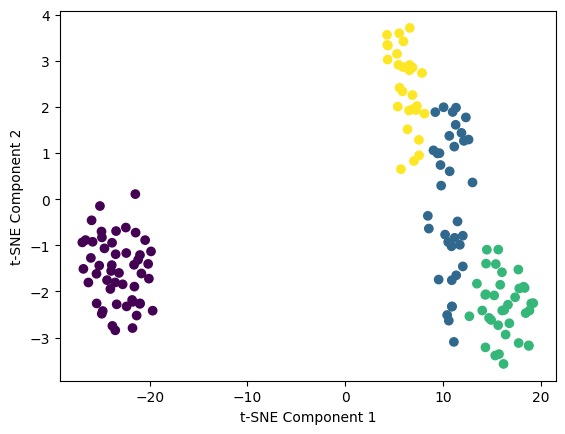

In [11]:
fig, ax = plt.subplots(1)
labels = hc.labels_
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")

# Add axis titles
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")

plt.show()

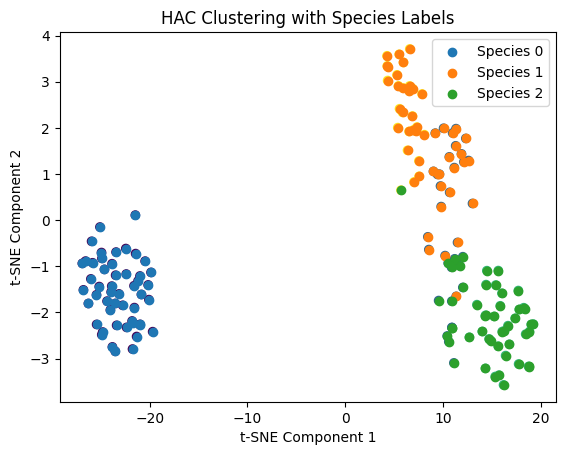

In [12]:
# Plot the assigned cluster labels
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")

# Plot the species labels
species_labels = np.unique(y)
for label in species_labels:
    indices = np.where(y == label)
    plt.scatter(
        X_tsne[indices, 0],
        X_tsne[indices, 1],
        marker="o",
        label=f"Species {label}",
    )

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("HAC Clustering with Species Labels")
plt.legend()
plt.show()